In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('hotel_bookings.csv')

# Data Exploration

In [4]:
data.shape

(119390, 32)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Checking for missing data

In [7]:
# Check the number and percentage of missing values
missing_data = data.isna().sum()
missing_percentage = round((missing_data / len(data) * 100), 2)

# Convert missing values into a DataFrame
missing_df = pd.DataFrame(
    {'missing_number': missing_data,
     'missing_percentage': missing_percentage}
)

# Filter out columns with no missing values
missing_df = missing_df[missing_df['missing_number'] > 0]

# Sort by highest percentage and number of missing values
missing_df.sort_values(by=['missing_percentage', 'missing_number'], ascending=False)

,missing_number,missing_percentage
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00


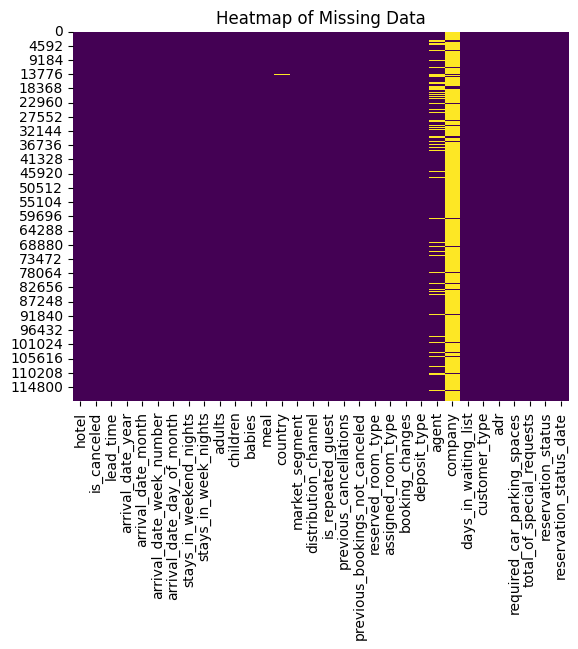

In [8]:
# Visualize missing data using a heatmap
sns.heatmap(data.isna(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

# Duplicate the dataset

In [9]:
# Duplicate the dataset
df = data.copy()
df.shape

(119390, 32)

# Check the number and catogerical values

In [10]:
# numerical data
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [11]:
# categorical data
cat_cols = df.select_dtypes(exclude='number').columns
cat_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

# Handling missing values

# company

In [12]:
# RangeIndex: 119390 / company NaN: 112593
# Fill missing values in the 'company' column with 0
df['company'] = df['company'].fillna(0)

# Display unique values in the 'company' column
df['company'].unique()

array([  0., 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [13]:
df.shape

(119390, 32)

# Agent

In [14]:
# Check unique values in the 'agent' column
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [15]:
# Check if 0 exists in the unique values of the 'agent' column
if 0 in df['agent'].unique():
    print('0 exists')
else:
    print('0 does not exist')

0 does not exist


In [16]:
# Fill missing values in the 'agent' column with 0
df['agent'] = df['agent'].fillna(0)

df['agent'].unique()

array([  0., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [17]:
df.shape

(119390, 32)

# Country

In [18]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [19]:
# The country of origin does not seem to be very important
# Replace NaN values in the 'country' column with 'UNK'
# Decide later whether to change 'UNK' to Portugal (PRT)
df['country'] = df['country'].replace(np.nan, 'UNK')

# Display unique values in the 'country' column
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'UNK', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA', 

In [20]:
# CN and CHN represent the same country (China), so unify them to the same value
df['country'] = df['country'].replace('CN', 'CHN')

# Display unique values in the 'country' column
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'UNK', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CHN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH',

In [21]:
df.shape

(119390, 32)

# children

In [22]:
# Check rows where 'children' column has missing values
df.loc[df['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,No Deposit,0.0,0.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,No Deposit,14.0,0.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,No Deposit,0.0,0.0,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,No Deposit,9.0,0.0,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [23]:
# Filling the 4 missing values in 'children' column with 0 seems reasonable
df['children'] = df['children'].fillna(0).astype(int)

# Display unique values in the 'children' column
df['children'].unique()

array([ 0,  1,  2, 10,  3])

In [24]:
df.shape

(119390, 32)

# Verify if all the missing values are handled

In [25]:
# Verify that all missing values have been handled
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Checking for duplicate values

In [26]:
df.duplicated().sum()

np.int64(31994)

In [27]:
duplicate_rows = df[df.duplicated(keep=False)] # keep=False shows all duplicate instances
duplicate_rows.head() # Inspect the first few duplicate rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,0.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,0.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,0.0,0,Transient,137.00,0,1,Check-Out,2015-07-07


In [28]:
df.drop_duplicates(inplace=True)  # Removes duplicate rows and modifies the DataFrame in place

In [29]:
df.duplicated().sum()  # Should now return 0
df.shape  # Check the new dimensions of the DataFrame

(87396, 32)

In [30]:
# Check data for each column
for col in df.columns:
    print(f'{col} :\n{df[col].unique()}\n')

hotel :
['Resort Hotel' 'City Hotel']

is_canceled :
[0 1]

lead_time :
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193

# Handling conflicting data

In [31]:
# Check for cases with no people in the booking
no_adults = df['adults'] == 0  # Check if the number of adults is 0
no_children = df['children'] == 0  # Check if the number of children is 0
no_babies = df['babies'] == 0  # Check if the number of babies is 0
no_people = no_adults & no_children & no_babies  # Identify rows where there are no adults, children, or babies

df[no_people].shape  # Output the number of such rows

(166, 32)

In [32]:
# Remove rows where there are no people in the booking
df = df[~no_people]  # Exclude rows where all counts (adults, children, babies) are 0

df.shape  # Output the new shape of the DataFrame

(87230, 32)

# Mapping

In [33]:
# Convert 'company' and 'agent' columns to integer type
df['company'] = df['company'].astype(int)
df['agent'] = df['agent'].astype(int)

In [34]:
# Mapping values in the 'meal' column
meal_mapping = {
    'Undefined': 'SC',  # Replace 'Undefined' with 'SC'
    'SC': 'SC',         # Self-catering
    'BB': 'BB',         # Bed & Breakfast
    'HB': 'HB',         # Half board
    'FB': 'FB'          # Full board
}

df['meal'] = df['meal'].map(meal_mapping)

In [35]:
# Specify the order of month names
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_date_month' to a categorical data type with a specific order
df['arrival_date_month'] = pd.Categorical(
    df['arrival_date_month'],
    categories=month_order,
    ordered=True
)

In [36]:
# Convert the 'reservation_status_date' column to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [37]:
# Create a 'year_month' column by combining year and month columns
df['year_month'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str)

# Define the order for year-month values
year_month_order = [
    '2015-July', '2015-August', '2015-September', '2015-October', '2015-November', '2015-December',
    '2016-January', '2016-February', '2016-March', '2016-April', '2016-May', '2016-June',
    '2016-July', '2016-August', '2016-September', '2016-October', '2016-November', '2016-December',
    '2017-January', '2017-February', '2017-March', '2017-April', '2017-May', '2017-June',
    '2017-July', '2017-August'
]

# Convert 'year_month' to a categorical type with the specified order
df['year_month'] = pd.Categorical(df['year_month'], categories=year_month_order, ordered=True)

# Display the 'year_month' column
df['year_month']

0           2015-July
1           2015-July
2           2015-July
3           2015-July
4           2015-July
             ...     
119385    2017-August
119386    2017-August
119387    2017-August
119388    2017-August
119389    2017-August
Name: year_month, Length: 87230, dtype: category
Categories (26, object): ['2015-July' < '2015-August' < '2015-September' < '2015-October' ... '2017-May' < '2017-June' < '2017-July' < '2017-August']

# Visualizing Numerical and categorical data

In [38]:
# numerical and categorical datas
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns

In [39]:
num_summary = df[num_cols].describe()
num_summary

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,0.038565,0.030402,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,0.192556,0.369344,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [40]:
cat_summary = df[cat_cols].astype('category').describe()
cat_summary

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,year_month
count,87230,87230,87230,87230,87230,87230,87230,87230,87230,87230,87230,87230,87230
unique,2,12,4,177,8,5,9,11,3,4,3,926,26
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-02-14 00:00:00,2017-May
freq,53274,11242,67907,27355,51553,69028,56436,46283,86085,71862,63221,211,4567


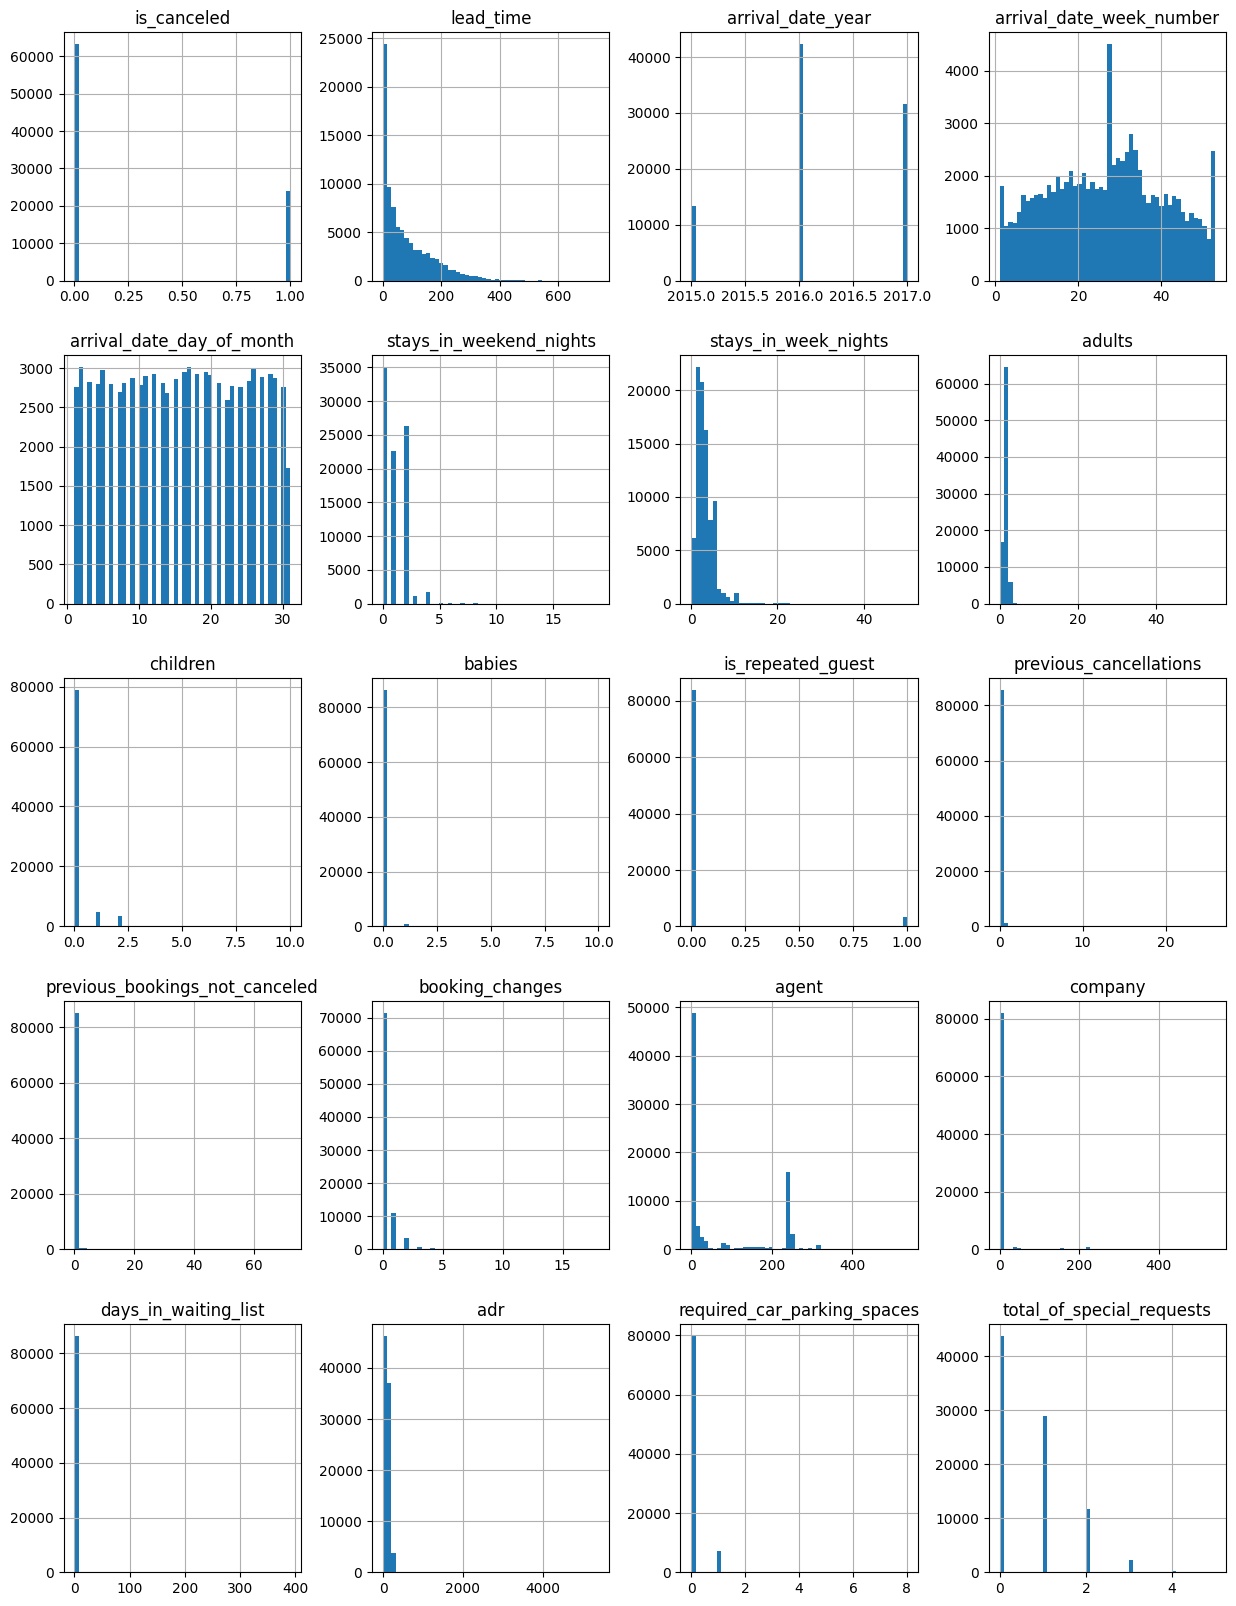

In [41]:
# Visualization of numerical variables
df[num_cols].hist(bins=50, figsize=(15,20))
plt.show()

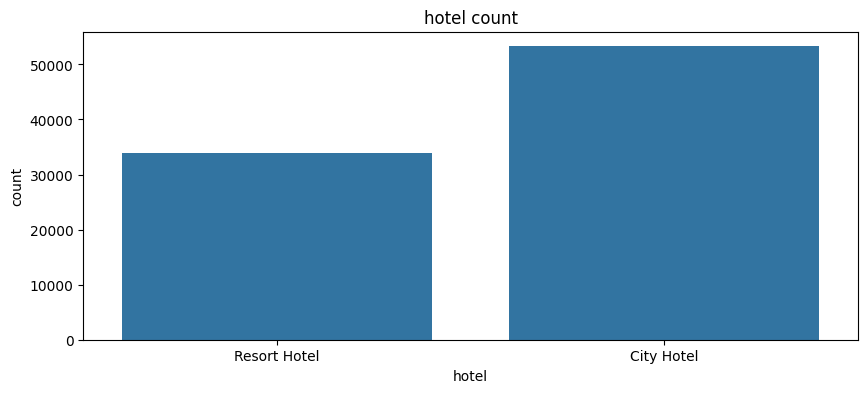

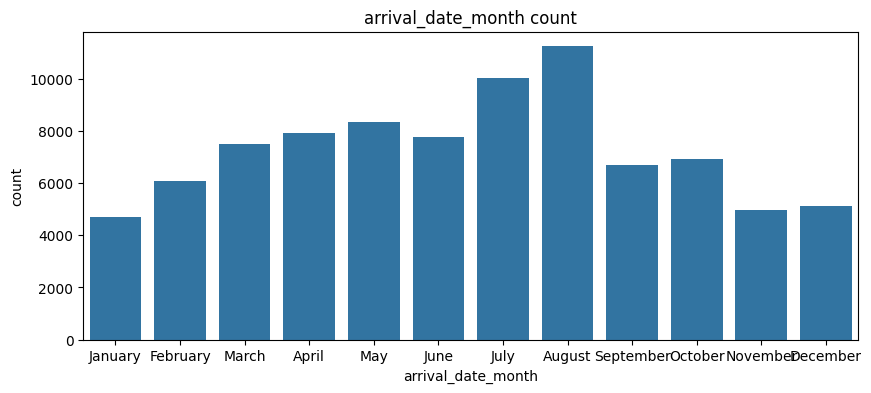

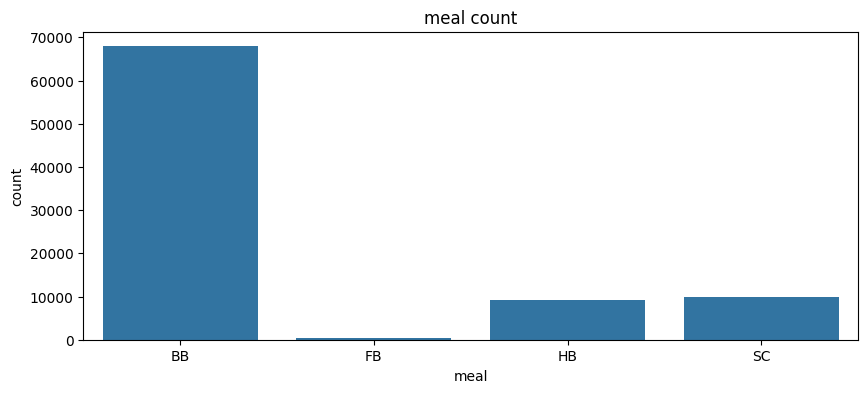

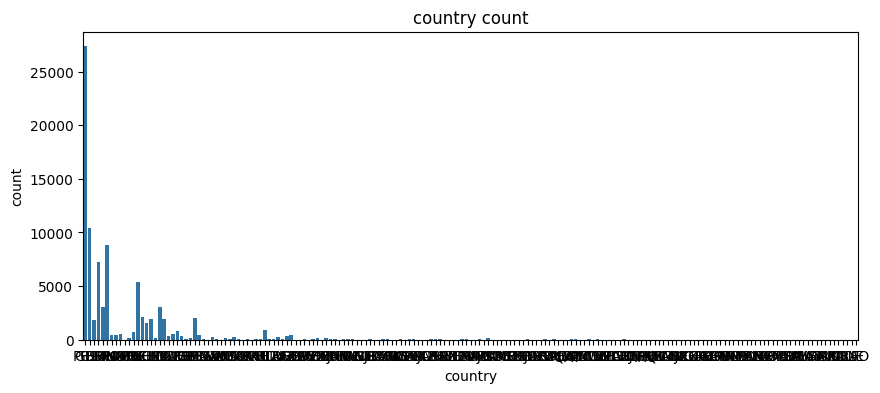

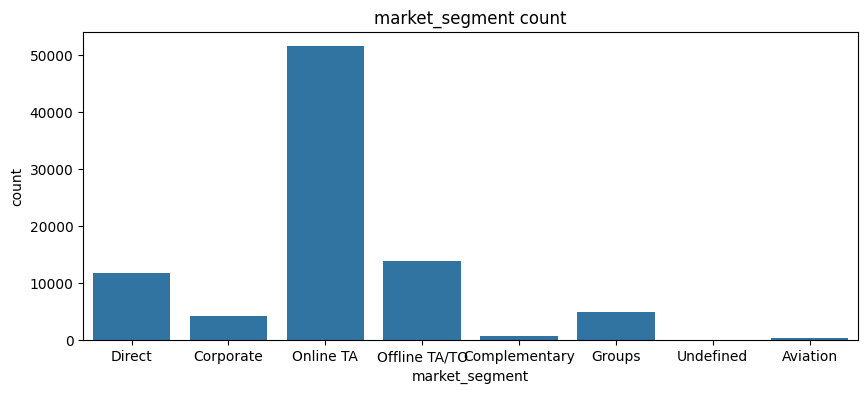

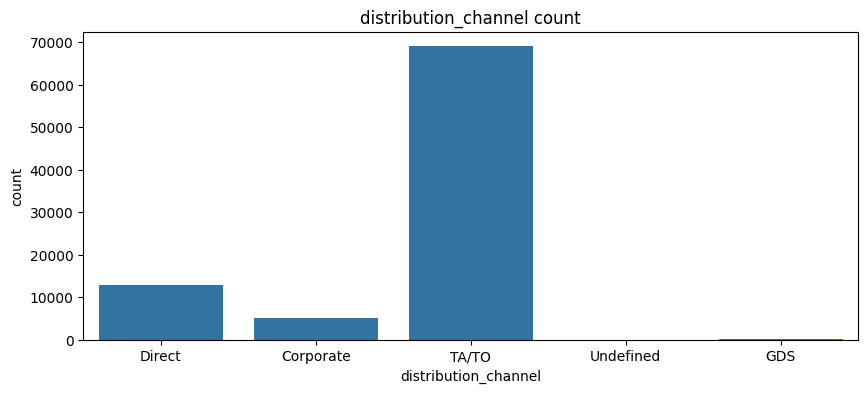

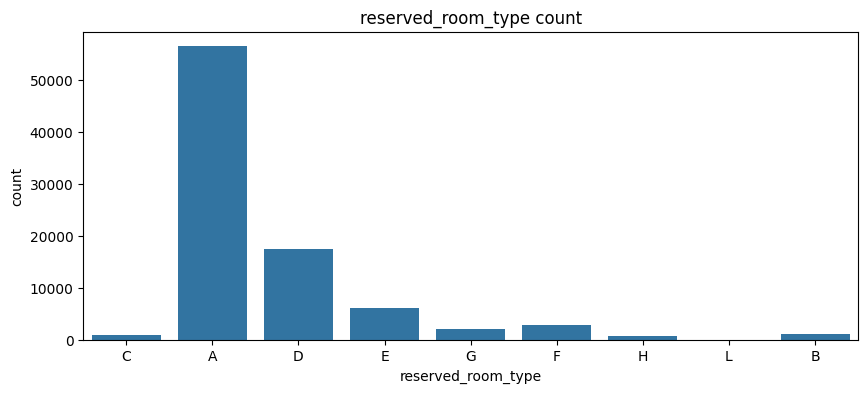

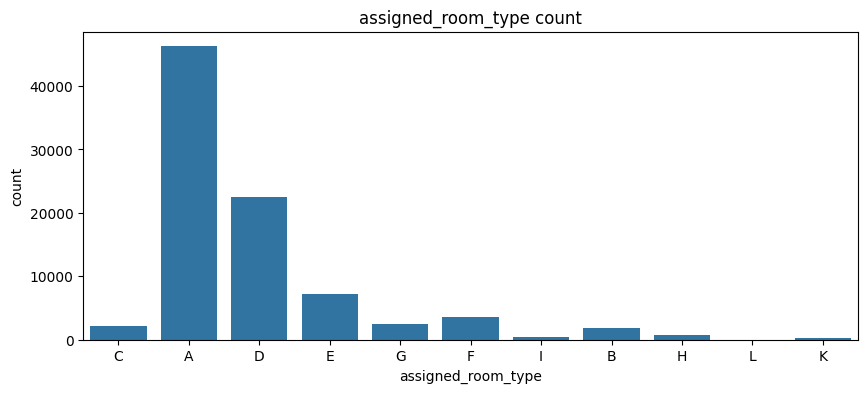

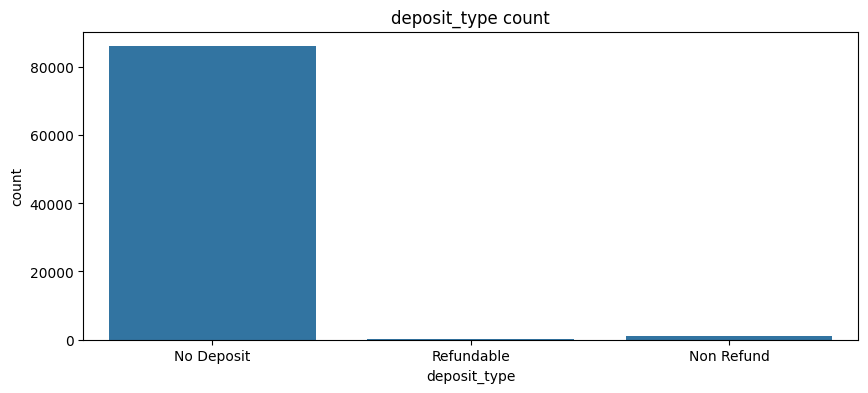

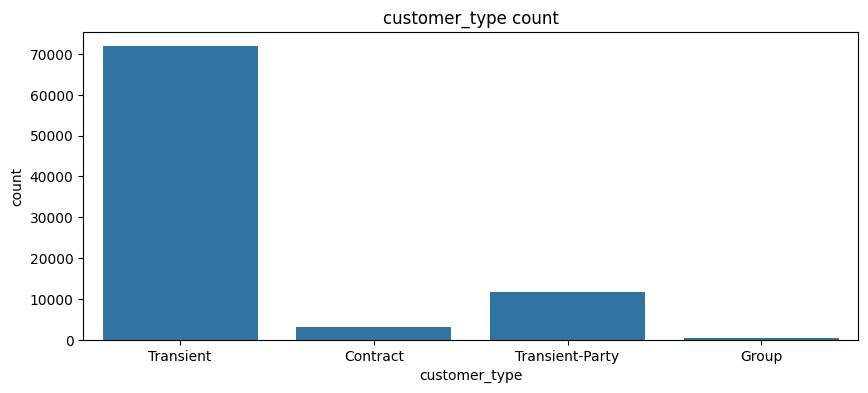

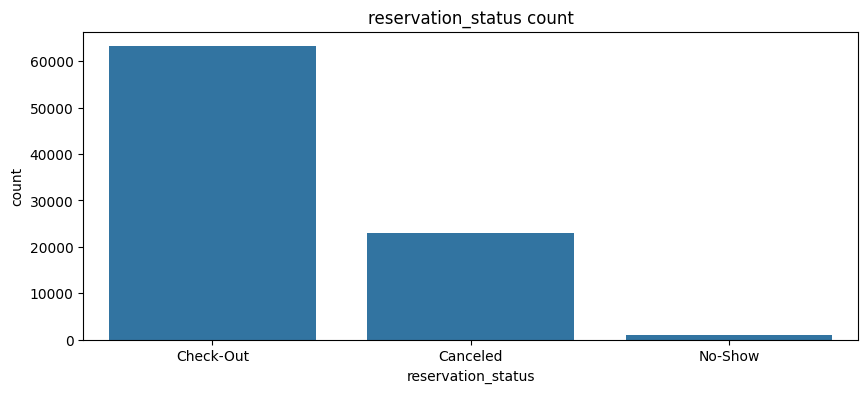

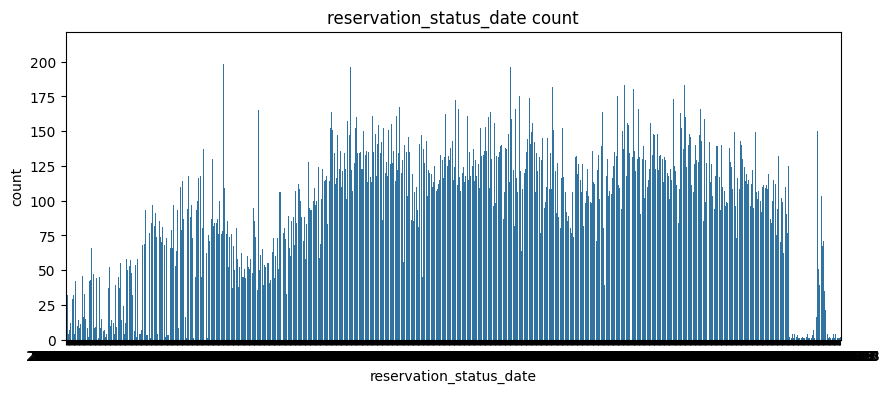

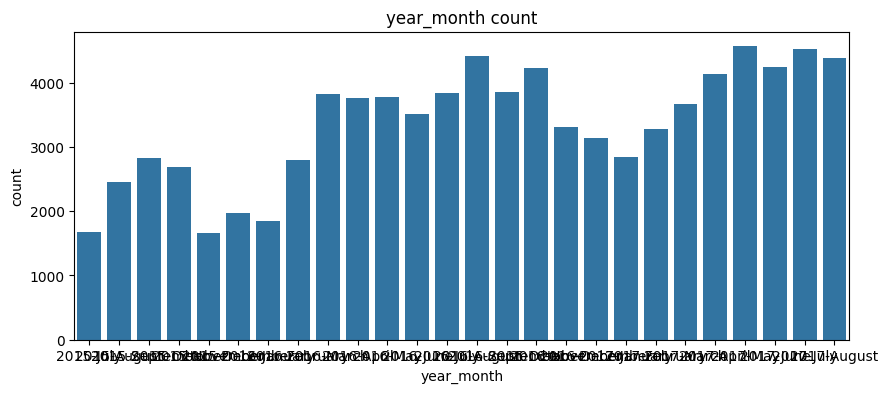

In [42]:
for col in cat_cols:
    plt.figure(figsize=(10, 4))  # Set figure size
    sns.countplot(data=df, x=col)  # Create a bar plot for the categorical column

    plt.title(f'{col} count')  # Add title using the column name
    plt.xlabel(col)  # Label the x-axis
    plt.ylabel('count')  # Label the y-axis

    plt.show()  # Show the plot

In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  category      
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  babies

# Revenue trends over time

C:\Users\Raut\AppData\Local\Temp\ipykernel_4628\1906700014.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_trends = df.groupby('year_month')['revenue'].sum().reset_index()


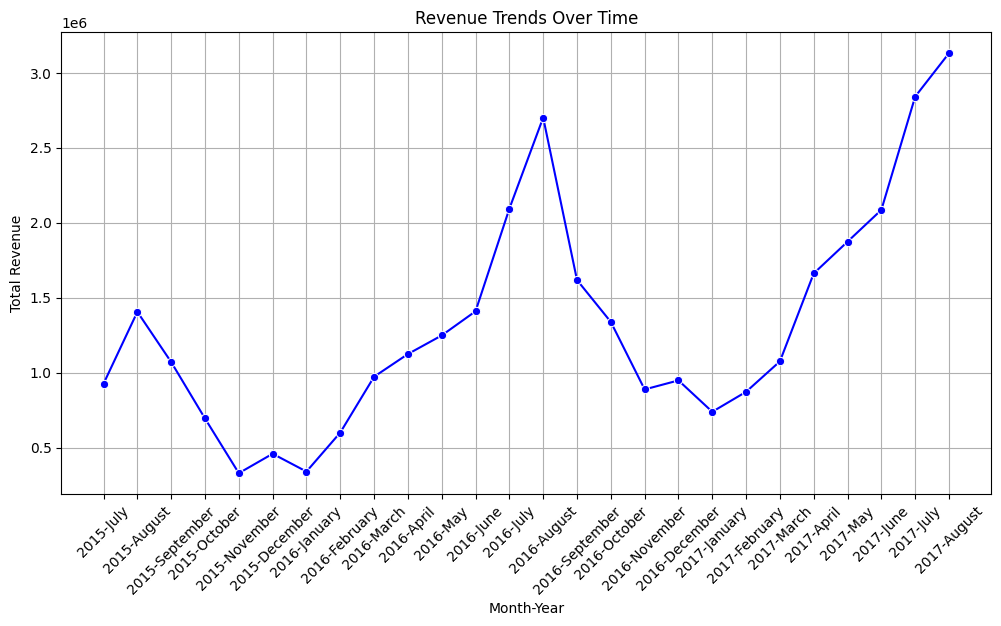

In [44]:

# Calculate revenue
df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])

# Aggregate revenue by time
revenue_trends = df.groupby('year_month')['revenue'].sum().reset_index()

# Plot revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_trends, x='year_month', y='revenue', marker='o', color='b')
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.title('Revenue Trends Over Time')
plt.grid()
plt.show()


# Cancellation rate as per total booking

In [45]:
cancellation_rate = (df['is_canceled'].mean()) * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Cancellation Rate: 27.52%


# Gegrograhpical distribution of users bookings

C:\Users\Raut\AppData\Local\Temp\ipykernel_4628\1506707378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_distribution.index, y=country_distribution.values, palette='viridis')


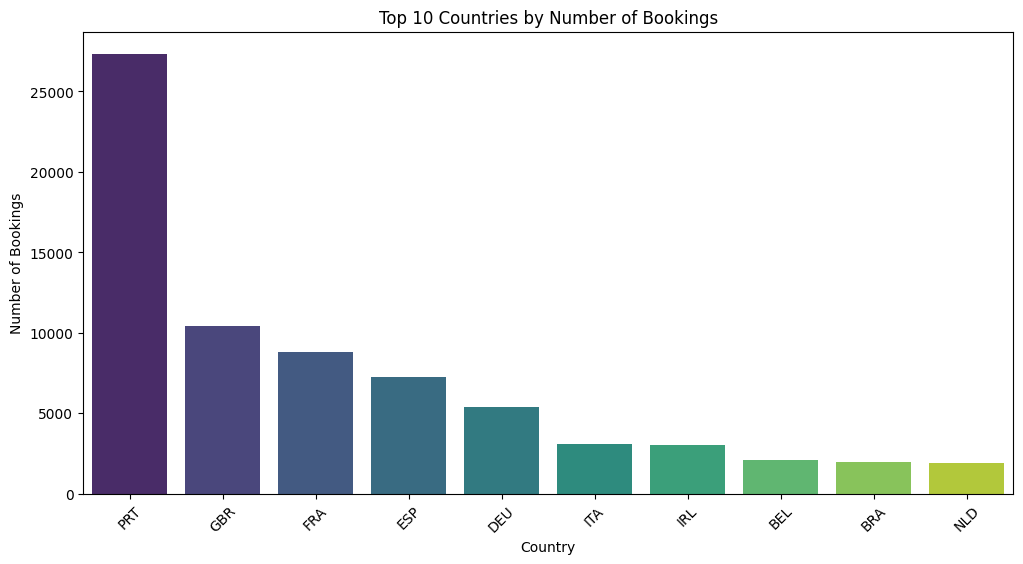

In [46]:
# Count bookings per country
country_distribution = df['country'].value_counts().head(10)  # Top 10 countries

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_distribution.index, y=country_distribution.values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Top 10 Countries by Number of Bookings')
plt.xticks(rotation=45)
plt.show()


# Booking lead time distribution

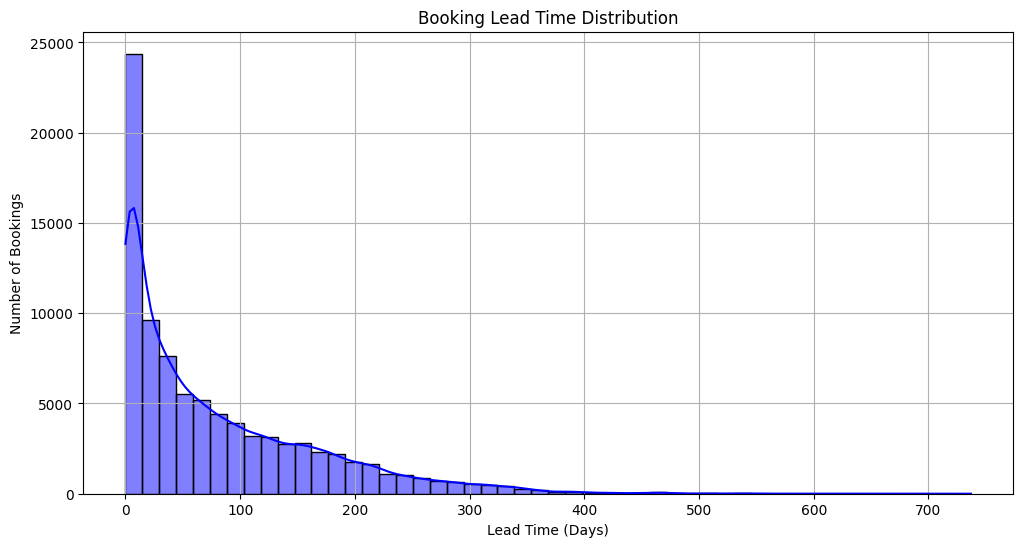

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Bookings')
plt.title('Booking Lead Time Distribution')
plt.grid()
plt.show()


# Cancellation rate by market analytics

C:\Users\Raut\AppData\Local\Temp\ipykernel_4628\2928842711.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_by_segment.index, y=cancellation_by_segment.values, palette='magma')


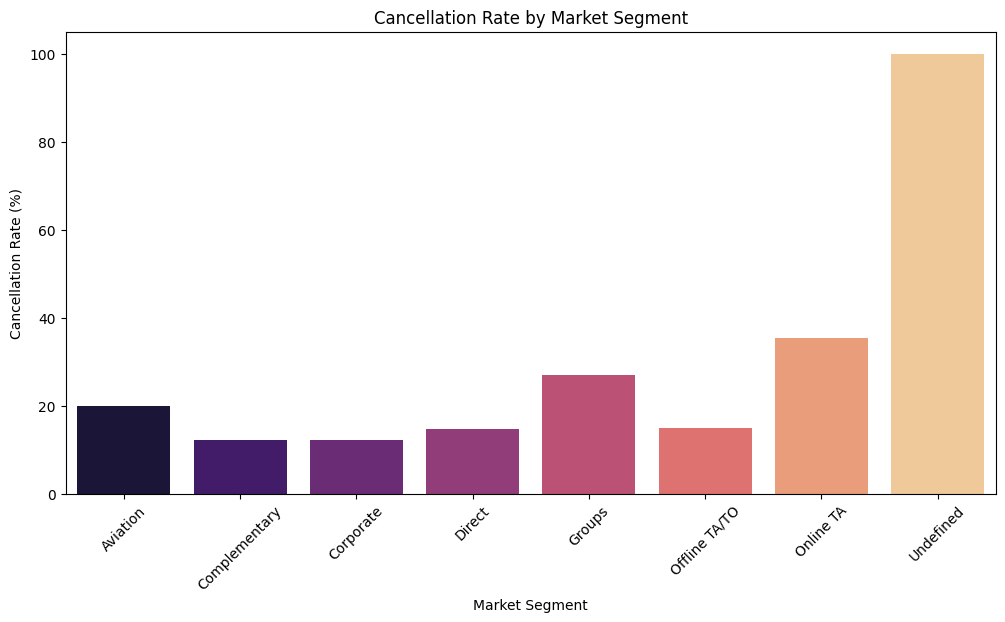

In [48]:
cancellation_by_segment = df.groupby('market_segment')['is_canceled'].mean() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=cancellation_by_segment.index, y=cancellation_by_segment.values, palette='magma')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Rate by Market Segment')
plt.xticks(rotation=45)
plt.show()


# Relation between Special request and cancellation

C:\Users\Raut\AppData\Local\Temp\ipykernel_4628\2064053863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['is_canceled'], y=df['total_of_special_requests'], palette='coolwarm')


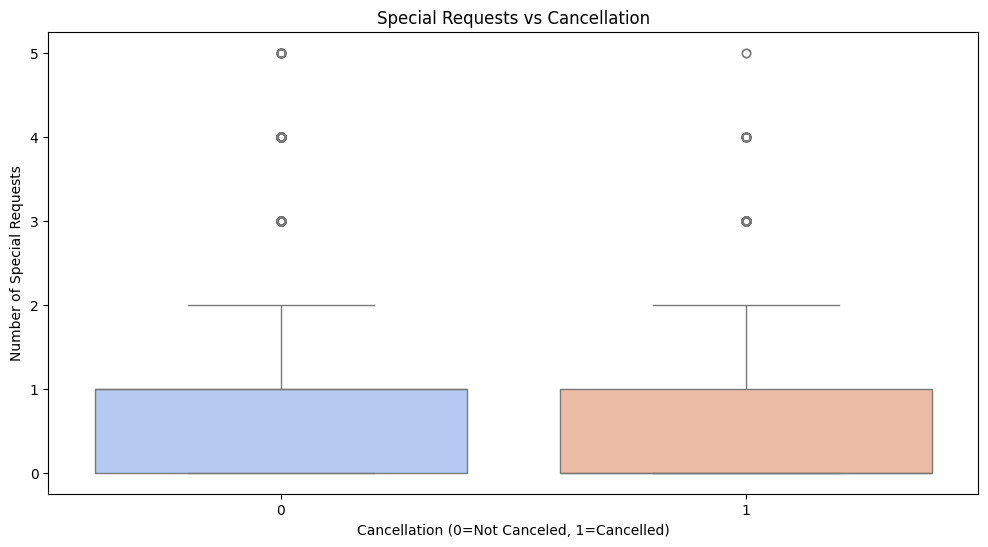

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['is_canceled'], y=df['total_of_special_requests'], palette='coolwarm')
plt.xlabel('Cancellation (0=Not Canceled, 1=Cancelled)')
plt.ylabel('Number of Special Requests')
plt.title('Special Requests vs Cancellation')
plt.show()
